In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\apple\Desktop\Machine Learning\ML Assignment\Insurance Ass\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: title={'center': 'Region'}, xlabel='region', ylabel='count'>

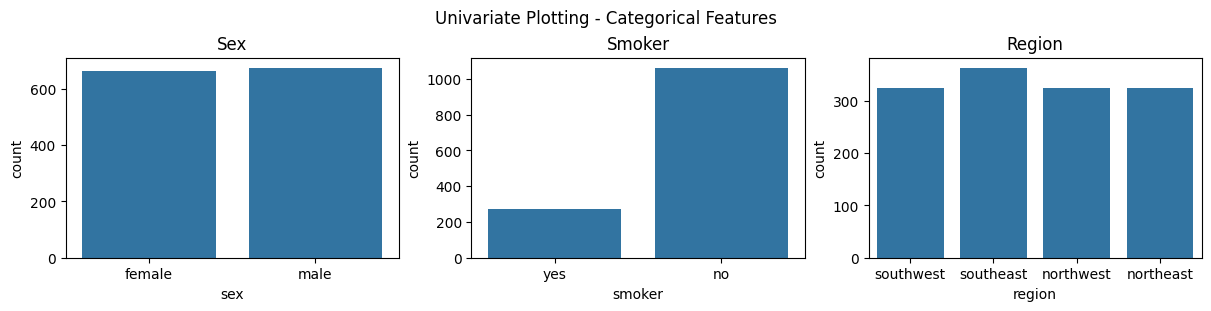

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Sex")
sns.countplot(data=df, x='sex', ax=axs[0])

axs[1].set_title("Smoker")
sns.countplot(data=df, x='smoker', ax=axs[1])

axs[2].set_title("Region")
sns.countplot(data=df, x='region', ax=axs[2])

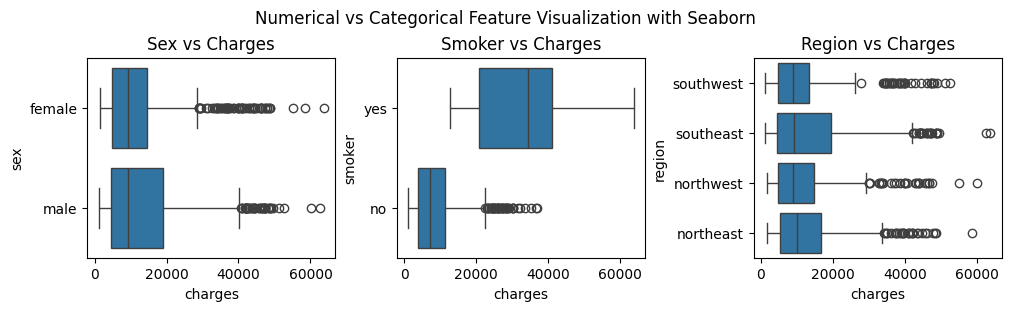

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Sex vs Charges")
sns.boxplot(data=df, x='charges', y='sex', ax=axs[0])

axs[1].set_title("Smoker vs Charges")
sns.boxplot(data=df, x='charges', y='smoker', ax=axs[1])

axs[2].set_title("Region vs Charges")
sns.boxplot(data=df, x='charges', y='region', ax=axs[2])

plt.show()

<Axes: title={'center': 'Children'}, xlabel='children', ylabel='Count'>

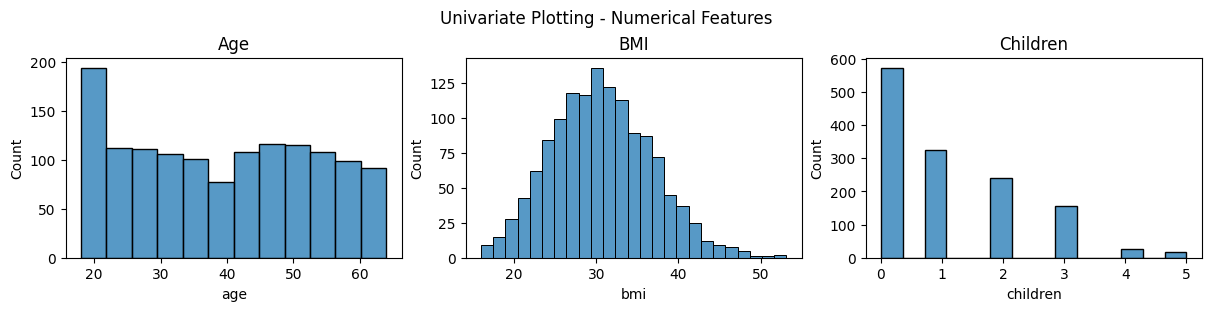

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("Age")
sns.histplot(data=df, x='age', ax=axs[0])

axs[1].set_title("BMI")
sns.histplot(data=df, x='bmi', ax=axs[1])

axs[2].set_title("Children")
sns.histplot(data=df, x='children', ax=axs[2])

In [9]:
y = df.pop("charges")
X = df

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1003, 6)
(335, 6)


In [12]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [13]:
X_train_cat = X_train.select_dtypes(include=["object"])
X_train_num = X_train.select_dtypes(include=["float64","int64"])

In [14]:
X_train_cat

,sex,smoker,region
1146,male,yes,southwest
691,male,no,southwest
1244,male,no,southeast
414,female,no,northwest
1144,male,no,southwest
...,...,...,...
84,female,yes,southwest
96,female,no,southwest
571,female,no,southeast
1197,male,no,southeast


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
1146,1.477571,0.334893,-0.922069
691,0.556059,0.907018,-0.079010
1244,-1.499621,0.424077,-0.922069
414,-1.428735,0.730332,-0.922069
1144,0.768715,0.250757,0.764048


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_transformed.shape)

X_train_cat_transformed.head()

Shape of Data before Transformation: (1003, 3)
Shape of Data after Transformation: (1003, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1146,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
691,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1244,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
414,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1144,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
1146
691
1244
414
1144


In [19]:
sex_encoder={'male':1,'female':0}
smoker_encoder={'yes':1,'no':0}
region_encoder={'northeast':1,'northwest':2,'southeast':3,'southwest':4}

In [20]:
X_train_cat_transformed['sex'] = X_train_cat['sex'].map(sex_encoder)
X_train_cat_transformed['smoker'] = X_train_cat['smoker'].map(smoker_encoder)
X_train_cat_transformed['region'] = X_train_cat['region'].map(region_encoder)

In [21]:
X_train_cat_transformed

,sex,smoker,region
1146,1,1,4
691,1,0,4
1244,1,0,3
414,0,0,2
1144,1,0,4
...,...,...,...
84,0,1,4
96,0,0,4
571,0,0,3
1197,1,0,3


In [22]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,age,bmi,children,sex,smoker,region
1146,1.477571,0.334893,-0.922069,1,1,4
691,0.556059,0.907018,-0.079010,1,0,4
1244,-1.499621,0.424077,-0.922069,1,0,3
414,-1.428735,0.730332,-0.922069,0,0,2
1144,0.768715,0.250757,0.764048,1,0,4


In [24]:
X_test_cat = X_test.select_dtypes(include=["object"])
X_test_num = X_test.select_dtypes(include=["float64","int64"])

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
440,-0.603496,0.376913,-0.078188
1202,-1.253099,0.289401,-0.871911
820,0.406999,0.533515,-0.078188
730,-0.314783,-0.891251,1.509258
78,-1.253099,1.470820,-0.871911


In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_test_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)

print("Shape of Data before Transformation:", X_test_cat.shape)
print("Shape of Data after Transformation:", X_test_cat_transformed.shape)

X_test_cat_transformed.head()

Shape of Data before Transformation: (335, 3)
Shape of Data after Transformation: (335, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
440,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1202,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
730,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
78,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [27]:
X_test_cat_transformed = pd.DataFrame(index=X_test_cat.index)

X_test_cat_transformed.head()

""
440
1202
820
730
78


In [28]:
sex_encoder={'male':1,'female':0}
smoker_encoder={'yes':1,'no':0}
region_encoder={'northeast':1,'northwest':2,'southeast':3,'southwest':4}

In [29]:
X_test_cat_transformed['sex'] = X_test_cat['sex'].map(sex_encoder)
X_test_cat_transformed['smoker'] = X_test_cat['smoker'].map(smoker_encoder)
X_test_cat_transformed['region'] = X_test_cat['region'].map(region_encoder)

In [30]:
X_test_cat_transformed

,sex,smoker,region
440,0,0,2
1202,1,0,2
820,1,0,4
730,1,1,3
78,0,0,1
...,...,...,...
727,0,1,1
475,1,1,2
232,0,0,4
512,1,0,1


In [31]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,age,bmi,children,sex,smoker,region
440,-0.603496,0.376913,-0.078188,0,0,2
1202,-1.253099,0.289401,-0.871911,1,0,2
820,0.406999,0.533515,-0.078188,1,0,4
730,-0.314783,-0.891251,1.509258,1,1,3
78,-1.253099,1.470820,-0.871911,0,0,1


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)

3962.918457432333

In [33]:
y_test_pred

array([ 7.30501088e+03,  3.99415406e+03,  1.02677414e+04,  3.03549075e+04,
        7.05243515e+03,  1.61421499e+03,  3.23710642e+04,  3.62249935e+04,
        2.76022483e+04,  8.40747275e+03,  1.68487276e+03,  8.08017223e+03,
        7.36587495e+03,  2.72328676e+04,  1.26000318e+04,  7.78835866e+03,
        6.50745384e+03,  1.10500457e+04,  3.03689724e+04,  2.84576862e+04,
        2.71933332e+04,  8.33152134e+03,  8.15547296e+03,  5.60863224e+03,
        9.32162530e+03,  3.38042152e+03,  5.99416324e+03,  5.78202902e+02,
        1.25198891e+04,  1.33420524e+04,  1.10434259e+04,  3.27133181e+04,
        1.68391571e+04,  2.75569212e+04, -1.71968103e+03,  3.44099620e+03,
        6.37556099e+03,  1.19591732e+04,  2.93508911e+04,  1.72650703e+04,
       -1.34809745e+03,  1.06100077e+04,  2.78235725e+04,  9.47045101e+03,
        1.52450893e+04,  4.77575835e+03,  7.64045102e+03,  1.33130966e+04,
        9.64434889e+03,  3.04098501e+04,  1.06528157e+02,  1.29119294e+04,
        8.64608174e+03,  

In [34]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
440,4738.26820,7305.010877
1202,2055.32490,3994.154055
820,7445.91800,10267.741398
730,19361.99880,30354.907473
78,2755.02095,7052.435147
...,...,...
727,16657.71745,28027.695814
475,28868.66390,37798.069167
232,1727.78500,-1678.135858
512,9361.32680,8945.520108


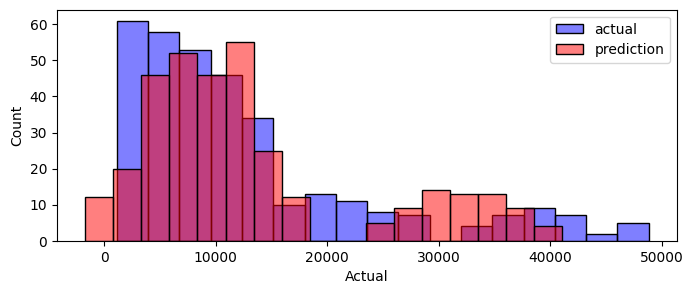

In [35]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

3730.694443265075

In [37]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
440,4738.26820,7305.010877,4351.181580
1202,2055.32490,3994.154055,5484.312386
820,7445.91800,10267.741398,8101.374800
730,19361.99880,30354.907473,18968.157660
78,2755.02095,7052.435147,5484.918226
...,...,...,...
727,16657.71745,28027.695814,14212.537460
475,28868.66390,37798.069167,24576.214034
232,1727.78500,-1678.135858,2427.880600
512,9361.32680,8945.520108,11077.490210


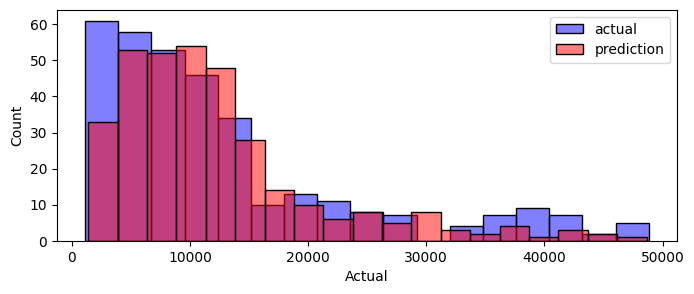

In [38]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

2502.988066564179

In [40]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
440,4738.26820,7305.010877,4351.181580,4151.02870
1202,2055.32490,3994.154055,5484.312386,1639.56310
820,7445.91800,10267.741398,8101.374800,7633.72060
730,19361.99880,30354.907473,18968.157660,18972.49500
78,2755.02095,7052.435147,5484.918226,2217.46915
...,...,...,...,...
727,16657.71745,28027.695814,14212.537460,17361.76610
475,28868.66390,37798.069167,24576.214034,29523.16560
232,1727.78500,-1678.135858,2427.880600,1737.37600
512,9361.32680,8945.520108,11077.490210,8827.20990


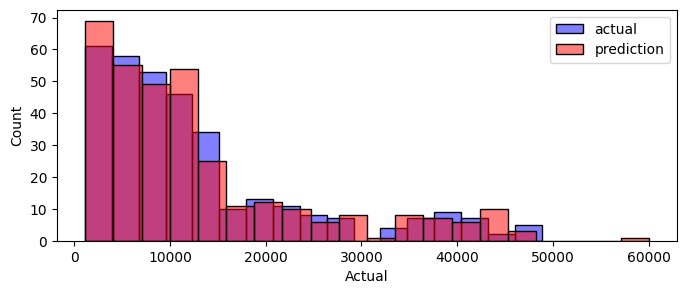

In [41]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

2605.9520660965522

In [43]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
440,4738.26820,7305.010877,4351.181580,4151.02870,5018.539317
1202,2055.32490,3994.154055,5484.312386,1639.56310,2187.692948
820,7445.91800,10267.741398,8101.374800,7633.72060,7573.554597
730,19361.99880,30354.907473,18968.157660,18972.49500,20014.592122
78,2755.02095,7052.435147,5484.918226,2217.46915,3623.353884
...,...,...,...,...,...
727,16657.71745,28027.695814,14212.537460,17361.76610,17546.219749
475,28868.66390,37798.069167,24576.214034,29523.16560,28214.491762
232,1727.78500,-1678.135858,2427.880600,1737.37600,1846.586011
512,9361.32680,8945.520108,11077.490210,8827.20990,11725.213218


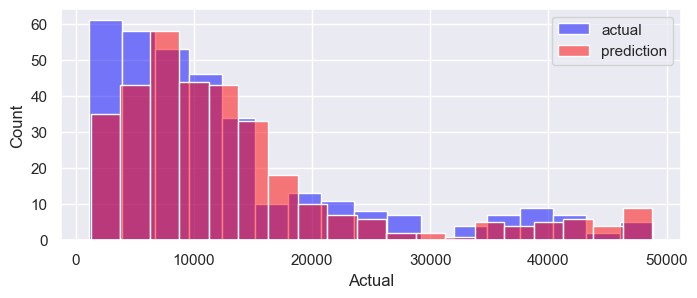

In [118]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual",multiple="stack")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [59]:
### Linear SVC Ploynomial Features

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

polynomial_svm_reg = make_pipeline(SVR(kernel="poly", degree=2, C=100))

polynomial_svm_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('svr', SVR(C=100, degree=2, kernel='poly'))])

In [60]:
y_test_pred = polynomial_svm_reg.predict(X_test_transformed)

In [61]:
output_df['Ploynomial SVR'] = y_test_pred

In [62]:
output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions,Ploynomial SVR
440,4738.26820,7305.010877,4351.181580,4151.02870,5018.539317,6898.491641
1202,2055.32490,3994.154055,5484.312386,1639.56310,2187.692948,5222.852005
820,7445.91800,10267.741398,8101.374800,7633.72060,7573.554597,7884.675674
730,19361.99880,30354.907473,18968.157660,18972.49500,20014.592122,10903.026637
78,2755.02095,7052.435147,5484.918226,2217.46915,3623.353884,7230.789549
...,...,...,...,...,...,...
727,16657.71745,28027.695814,14212.537460,17361.76610,17546.219749,9218.428741
475,28868.66390,37798.069167,24576.214034,29523.16560,28214.491762,14616.928397
232,1727.78500,-1678.135858,2427.880600,1737.37600,1846.586011,1320.056357
512,9361.32680,8945.520108,11077.490210,8827.20990,11725.213218,9383.969657


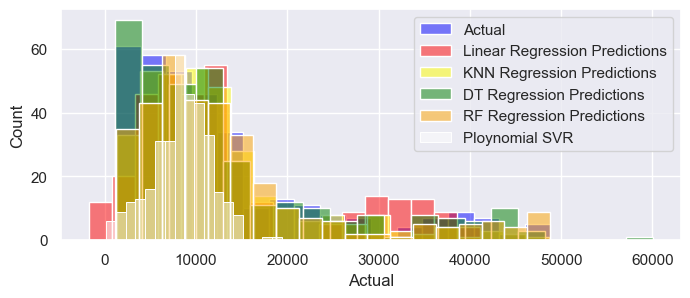

In [92]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="Linear Regression Predictions")
sns.histplot(output_df['KNN Regression Predictions'], color='yellow', alpha=0.5, label="KNN Regression Predictions")
sns.histplot(output_df['DT Regression Predictions'], color='green', alpha=0.5, label="DT Regression Predictions")
sns.histplot(output_df['RF Regression Predictions'], color='orange', alpha=0.5, label="RF Regression Predictions")
sns.histplot(output_df['Ploynomial SVR'], color='white', alpha=0.5, label="Ploynomial SVR")

plt.legend()

<Axes: title={'center': 'Actual Vs Ploynomial SVR'}, xlabel='Actual', ylabel='Count'>

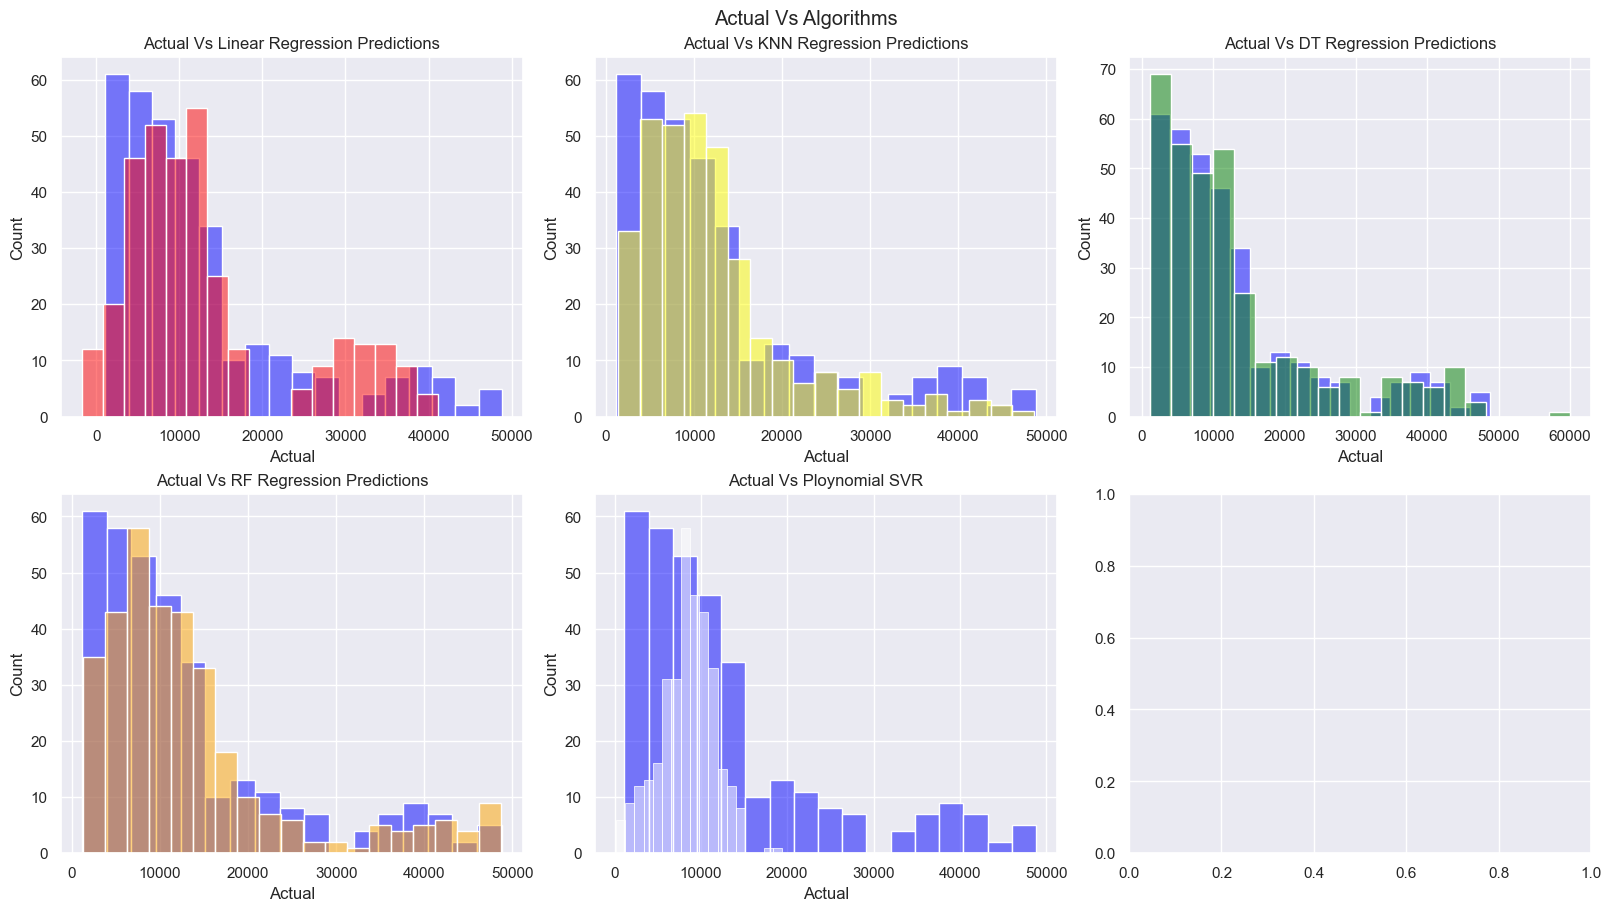

In [127]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9), constrained_layout=True)
fig.suptitle("Actual Vs Algorithms")

axs[0,0].set_title("Actual Vs Linear Regression Predictions")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[0,0])
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="Linear Regression Predictions",ax=axs[0,0])

axs[0,1].set_title("Actual Vs KNN Regression Predictions")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[0,1])
sns.histplot(output_df['KNN Regression Predictions'], color='yellow', alpha=0.5, label="KNN Regression Predictions",ax=axs[0,1])

axs[0,2].set_title("Actual Vs DT Regression Predictions")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[0,2])
sns.histplot(output_df['DT Regression Predictions'], color='green', alpha=0.5, label="DT Regression Predictions",ax=axs[0,2])

axs[1,0].set_title("Actual Vs RF Regression Predictions")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[1,0])
sns.histplot(output_df['RF Regression Predictions'], color='orange', alpha=0.5, label="RF Regression Predictions",ax=axs[1,0])

axs[1,1].set_title("Actual Vs Ploynomial SVR")
sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="Actual",ax=axs[1,1])
sns.histplot(output_df['Ploynomial SVR'], color='white', alpha=0.5, label="Ploynomial SVR",ax=axs[1,1])

